In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv', error_bad_lines=False, nrows=10000).sample(frac=1)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7677,2013-09-14,Cobar,8.6,23.5,0.0,11.0,NaN,W,35.0,SW,WSW,13.0,19.0,53.0,25.0,1015.0,1012.9,0.0,NaN,16.1,22.8,No,No
2381,2015-09-06,Albury,5.2,16.4,0.0,NaN,NaN,N,33.0,SW,N,6.0,22.0,90.0,58.0,1022.8,1018.7,8.0,3.0,8.7,16.0,No,Yes
7315,2012-07-20,Cobar,2.5,14.3,0.0,2.6,NaN,S,31.0,S,S,9.0,17.0,72.0,42.0,1028.8,1026.6,0.0,1.0,6.4,14.1,No,No
2844,2016-12-12,Albury,11.7,33.0,0.0,NaN,NaN,W,31.0,SSE,SSW,7.0,15.0,57.0,24.0,1020.7,1016.4,NaN,NaN,20.6,31.0,No,No
8049,2014-09-21,Cobar,7.6,24.2,0.0,6.4,NaN,E,41.0,ENE,ESE,19.0,19.0,38.0,15.0,1027.2,1023.4,1.0,1.0,17.2,23.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,2016-05-15,Cobar,12.4,23.3,0.0,NaN,NaN,W,28.0,NNW,W,11.0,15.0,70.0,40.0,1021.2,1018.4,1.0,5.0,15.7,22.9,No,No
6535,2010-05-02,Cobar,10.9,25.6,0.0,3.6,10.5,E,17.0,ENE,W,9.0,4.0,48.0,24.0,1025.8,1023.0,1.0,1.0,18.8,25.0,No,No
2360,2015-08-16,Albury,1.7,15.9,0.2,NaN,NaN,W,30.0,SE,WNW,6.0,19.0,100.0,55.0,1028.5,1023.8,8.0,7.0,5.5,14.6,No,No
4615,2013-07-23,BadgerysCreek,-0.4,16.4,0.0,NaN,NaN,SW,44.0,N,SW,4.0,26.0,79.0,47.0,1020.3,1019.0,NaN,NaN,8.5,15.0,No,No


Remoção de colunas que não serão importantes para classificação

In [3]:
del df['Date']
del df['Evaporation']
del df['Sunshine']
del df['WindGustDir']
del df['WindGustSpeed']
del df['WindDir9am']
del df['Pressure9am']
del df['Pressure3pm']
del df['Cloud9am']
del df['Cloud3pm']
del df['Temp9am']
del df['WindDir3pm']   
del df['WindSpeed9am']   
del df['WindSpeed3pm']   


In [4]:
df

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow
7677,Cobar,8.6,23.5,0.0,53.0,25.0,22.8,No,No
2381,Albury,5.2,16.4,0.0,90.0,58.0,16.0,No,Yes
7315,Cobar,2.5,14.3,0.0,72.0,42.0,14.1,No,No
2844,Albury,11.7,33.0,0.0,57.0,24.0,31.0,No,No
8049,Cobar,7.6,24.2,0.0,38.0,15.0,23.5,No,No
...,...,...,...,...,...,...,...,...,...
8651,Cobar,12.4,23.3,0.0,70.0,40.0,22.9,No,No
6535,Cobar,10.9,25.6,0.0,48.0,24.0,25.0,No,No
2360,Albury,1.7,15.9,0.2,100.0,55.0,14.6,No,No
4615,BadgerysCreek,-0.4,16.4,0.0,79.0,47.0,15.0,No,No


### Removendo linhas com NaN ou NA

In [5]:
hasNan = df.isnull().sum()
print(hasNan)
df.dropna(inplace=True)
hasNan = df.isnull().sum()
print(hasNan)

Location          0
MinTemp          54
MaxTemp          45
Rainfall        132
Humidity9am     188
Humidity3pm     189
Temp3pm          60
RainToday       132
RainTomorrow    132
dtype: int64
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Humidity9am     0
Humidity3pm     0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


### Fazendo o label_encoder para os dados binários

In [6]:
from sklearn.preprocessing import LabelEncoder

rainToday = []
raintTomorrow = []

le = LabelEncoder()
le.fit(df['RainToday'])
df['RainToday'] = le.transform(df['RainToday'])
rainToday = le.inverse_transform(df['RainToday'])

le.fit(df['RainTomorrow'])
df['RainTomorrow'] = le.transform(df['RainTomorrow'])
rainTomorrow = le.inverse_transform(df['RainTomorrow'])

In [7]:
print("RainToday: ")
print(rainToday)

print("RainTomorrow: ")
print(rainTomorrow)

RainToday: 
['No' 'No' 'No' ... 'No' 'No' 'No']
RainTomorrow: 
['No' 'Yes' 'No' ... 'No' 'No' 'No']


In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow
7677,Cobar,8.6,23.5,0.0,53.0,25.0,22.8,0,0
2381,Albury,5.2,16.4,0.0,90.0,58.0,16.0,0,1
7315,Cobar,2.5,14.3,0.0,72.0,42.0,14.1,0,0
2844,Albury,11.7,33.0,0.0,57.0,24.0,31.0,0,0
8049,Cobar,7.6,24.2,0.0,38.0,15.0,23.5,0,0
...,...,...,...,...,...,...,...,...,...
5072,BadgerysCreek,10.6,31.7,0.0,77.0,37.0,30.5,0,0
8651,Cobar,12.4,23.3,0.0,70.0,40.0,22.9,0,0
6535,Cobar,10.9,25.6,0.0,48.0,24.0,25.0,0,0
2360,Albury,1.7,15.9,0.2,100.0,55.0,14.6,0,0


### Verificação da necessidade de remoção de outliers

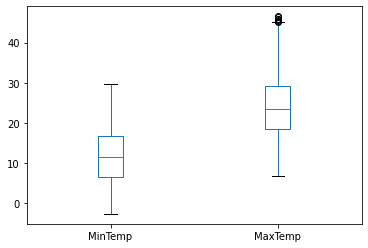

In [9]:
df[['MinTemp', 'MaxTemp']].plot(kind = 'box')

**Como a base contém dados de temperaturas mínimas e máximas, os outliers não são de fato outliers. O que acontece é que nas estações do ano, as temperaturas mudam drasticamente e isso faz com o que as distâncias entre os atributos sejam grandes.**

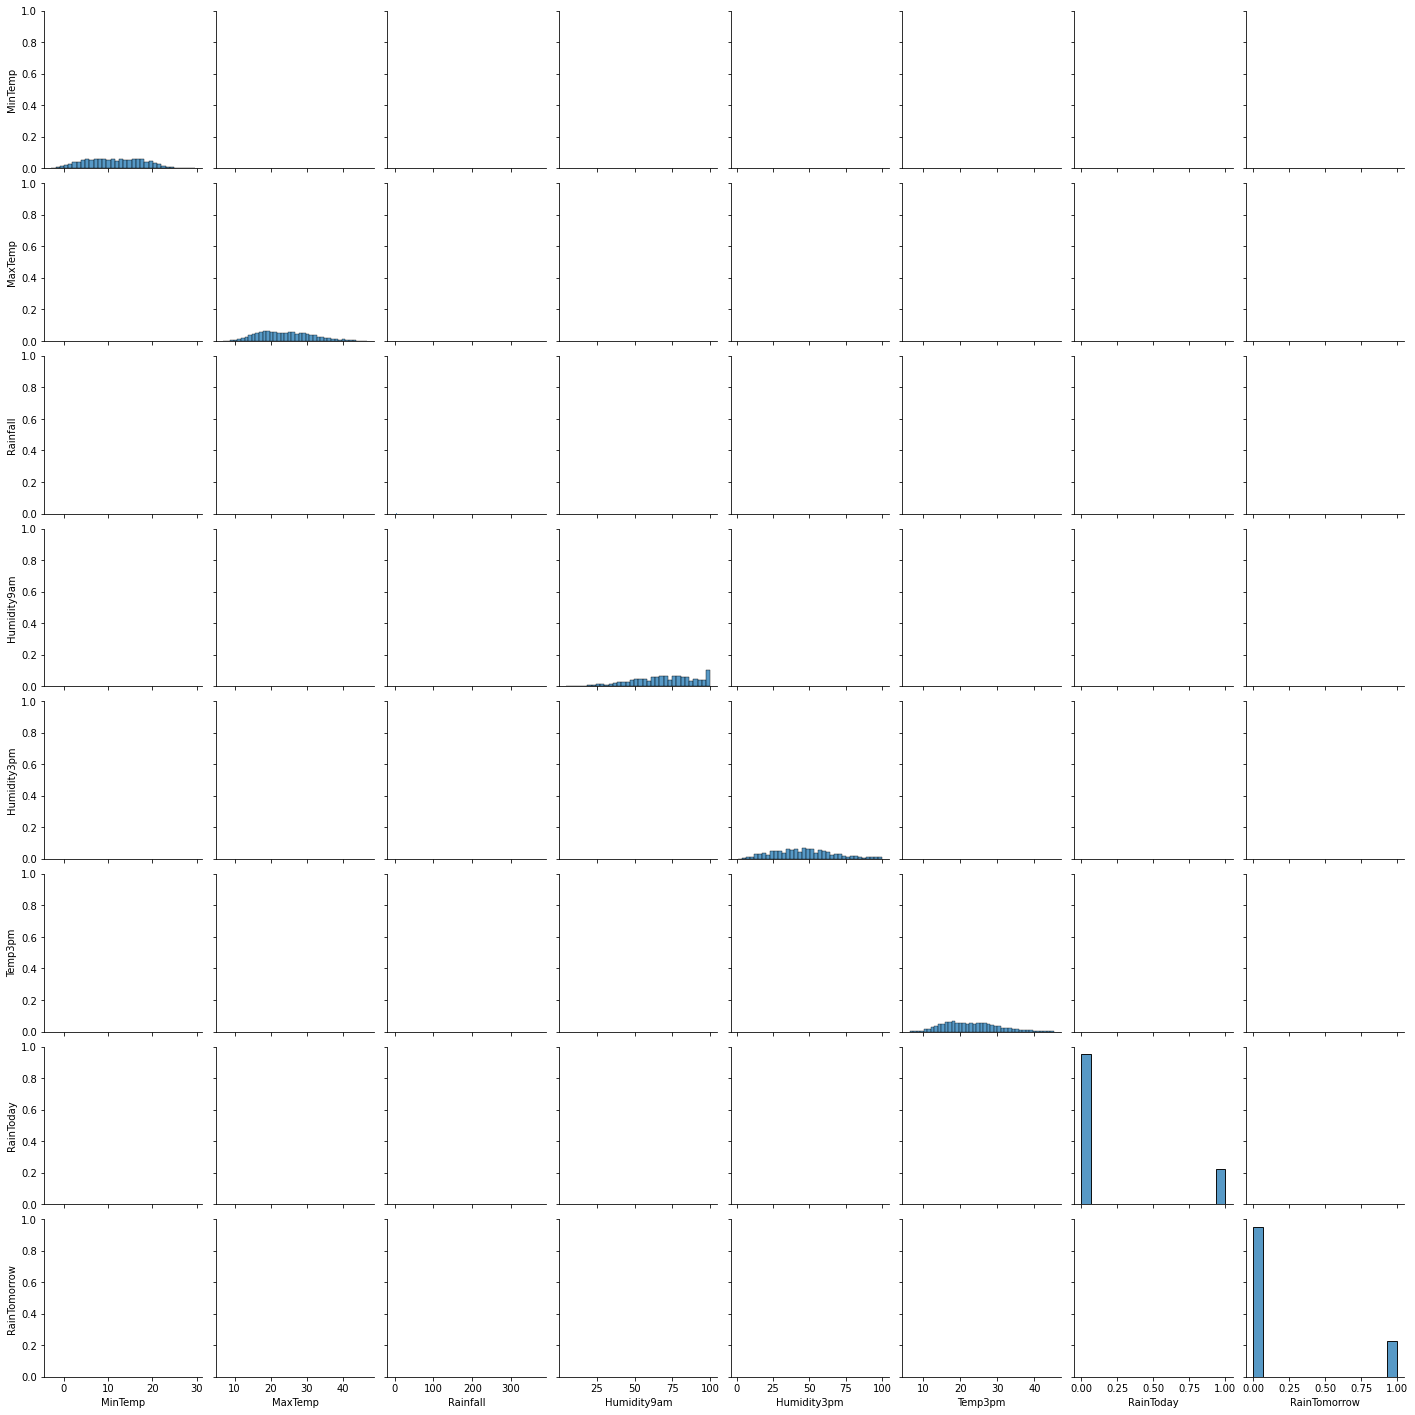

In [10]:
import seaborn as sb

sb.pairplot(df, kind='') #Gráfico com ondas

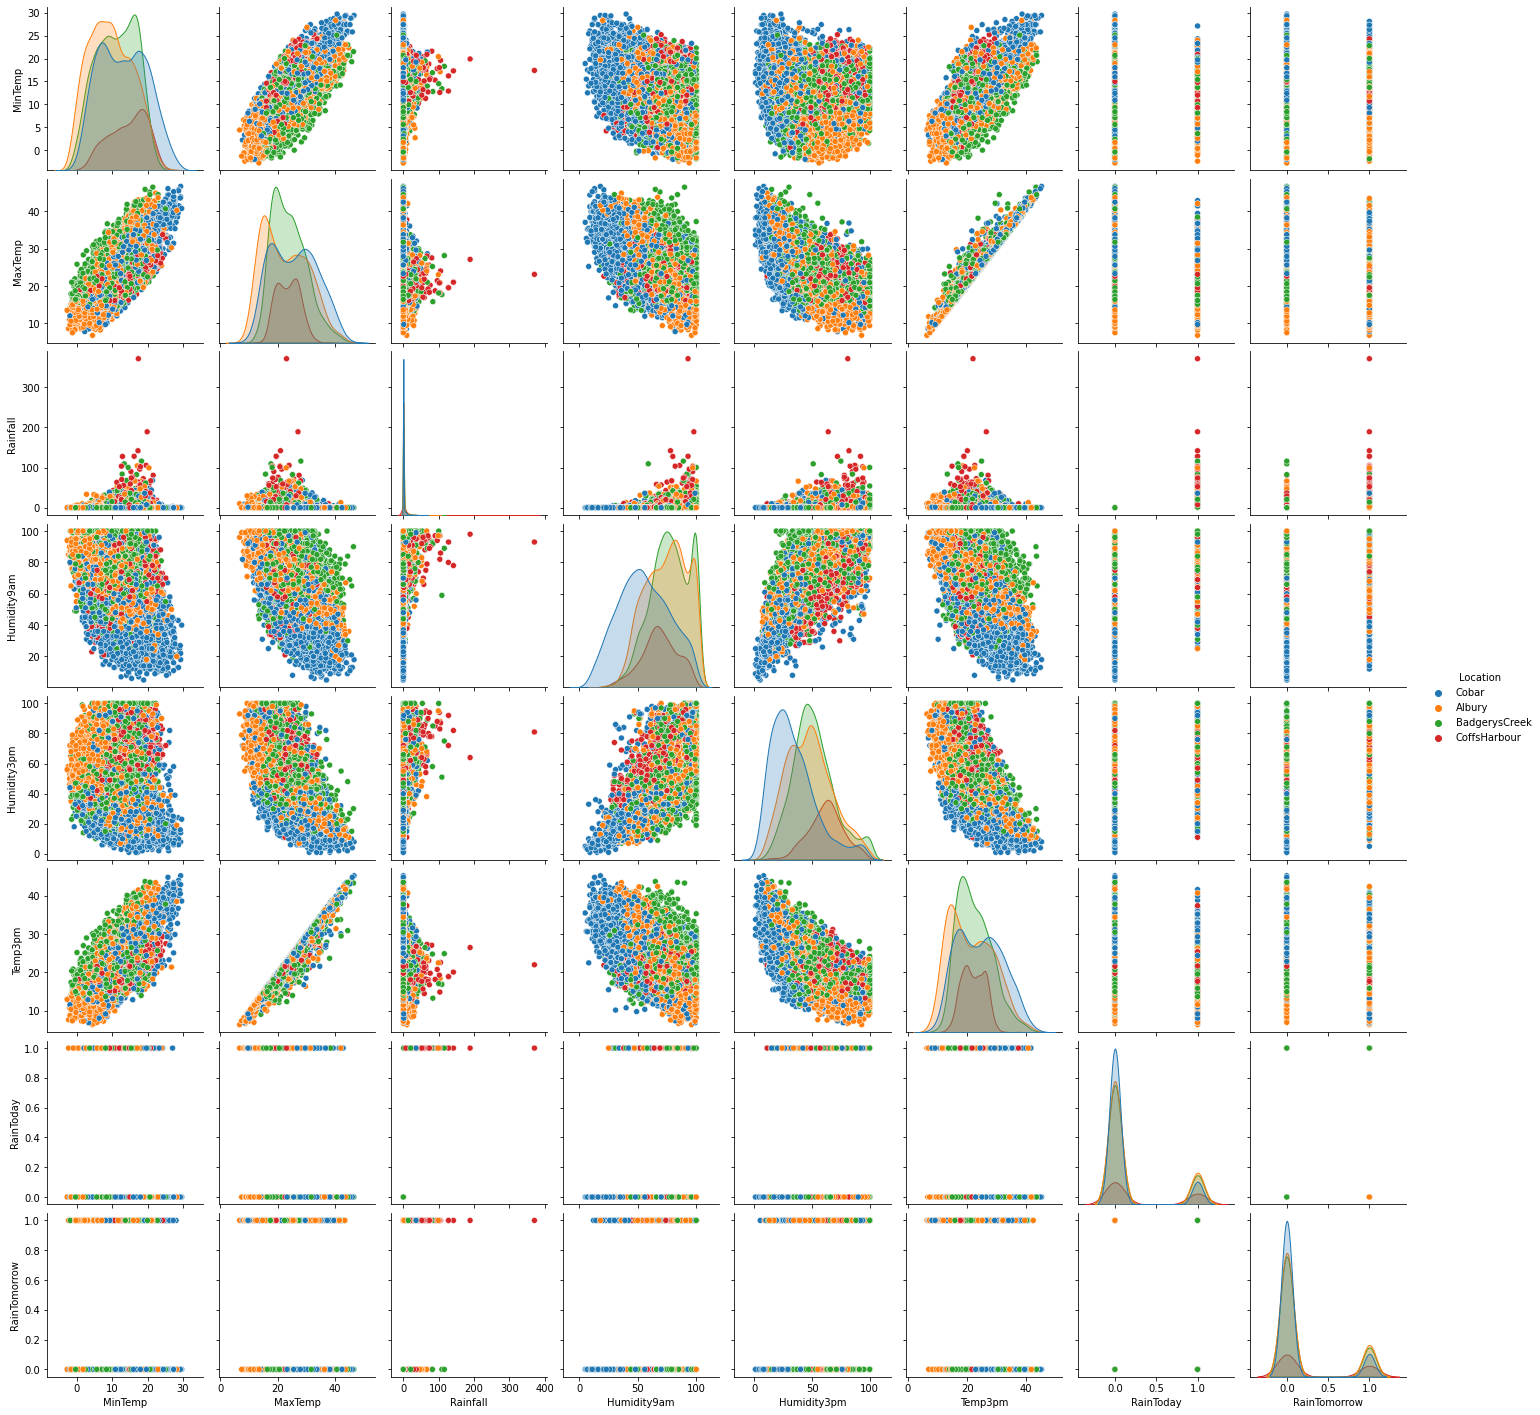

In [11]:
sb.pairplot(data=df, hue='Location') #Gráfico de sobreposição

### Transformando a classe em dados numericos

In [12]:
le.fit(df['Location'])
df['Location'] = le.transform(df['Location'])
rainTomorrow = le.inverse_transform(df['Location'])

df['Location'].value_counts()

0    2981
2    2860
1    2842
3     936
Name: Location, dtype: int64

In [13]:
from imblearn.under_sampling import NearMiss 

X, y = NearMiss().fit_resample(df.drop(columns=['Location']), df['Location'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [14]:
dfBalanceado = pd.DataFrame(X, columns=df.columns.drop('Location'))
dfBalanceado['Location'] = y
print(dfBalanceado)

      MinTemp  MaxTemp  Rainfall  ...  RainToday  RainTomorrow  Location
0        11.4     22.2       0.0  ...        0.0           0.0         0
1         8.2     22.2       0.0  ...        0.0           0.0         0
2         1.6     17.2       0.0  ...        0.0           0.0         0
3         2.3     18.0       0.0  ...        0.0           0.0         0
4        14.5     26.9       0.0  ...        0.0           0.0         0
...       ...      ...       ...  ...        ...           ...       ...
3739      6.3     20.0       0.0  ...        0.0           0.0         3
3740      9.3     16.1       1.4  ...        1.0           0.0         3
3741      7.1     21.9       0.0  ...        0.0           0.0         3
3742     14.8     23.1       7.2  ...        1.0           0.0         3
3743     15.0     22.6       0.0  ...        0.0           0.0         3

[3744 rows x 9 columns]


In [15]:
dfBalanceado['Location'].value_counts()

3    936
1    936
2    936
0    936
Name: Location, dtype: int64

In [16]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

dfStandard = dfBalanceado.copy()

dfStandard[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']] = StandardScaler().fit_transform(dfStandard[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']])

dfStandard

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow,Location
0,0.061312,0.015536,-0.188333,-0.270677,-0.070657,0.108431,-0.464311,-0.522115,0
1,-0.518964,0.015536,-0.188333,0.270352,-0.070657,-0.167361,-0.464311,-0.522115,0
2,-1.715786,-1.157642,-0.188333,-0.000163,-0.497926,-1.019811,-0.464311,-0.522115,0
3,-1.588850,-0.969933,-0.188333,-0.000163,-0.436888,-0.844307,-0.464311,-0.522115,0
4,0.623456,1.118323,-0.188333,-0.203048,-0.131696,1.261746,-0.464311,-0.522115,0
...,...,...,...,...,...,...,...,...,...
3739,-0.863504,-0.500662,-0.188333,-0.676448,-0.009619,-0.769091,-0.464311,-0.522115,3
3740,-0.319494,-1.415741,-0.054710,-0.270677,-0.192734,-1.395892,2.153730,-0.522115,3
3741,-0.718435,-0.054855,-0.188333,-0.744077,-0.192734,-0.242578,-0.464311,-0.522115,3
3742,0.677857,0.226708,0.498871,0.067466,0.295573,0.233792,2.153730,-0.522115,3


In [18]:
from sklearn.preprocessing import MinMaxScaler

dfMinMax = dfBalanceado.copy()

dfMinMax[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']] = MinMaxScaler().fit_transform(dfMinMax[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am',
       'Humidity3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']])

dfMinMax

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow,Location
0,0.465116,0.375000,0.000000,0.544304,0.460674,0.388679,0.0,0.0,0
1,0.341085,0.375000,0.000000,0.645570,0.460674,0.347170,0.0,0.0,0
2,0.085271,0.173387,0.000000,0.594937,0.382022,0.218868,0.0,0.0,0
3,0.112403,0.205645,0.000000,0.594937,0.393258,0.245283,0.0,0.0,0
4,0.585271,0.564516,0.000000,0.556962,0.449438,0.562264,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
3739,0.267442,0.286290,0.000000,0.468354,0.471910,0.256604,0.0,0.0,3
3740,0.383721,0.129032,0.003774,0.544304,0.438202,0.162264,1.0,0.0,3
3741,0.298450,0.362903,0.000000,0.455696,0.438202,0.335849,0.0,0.0,3
3742,0.596899,0.411290,0.019407,0.607595,0.528090,0.407547,1.0,0.0,3


In [19]:
dfStandard.to_csv('/content/drive/MyDrive/dfStandard.csv', index=False)
dfMinMax.to_csv('/content/drive/MyDrive/dfMinMax.csv', index=False)

**KNN com StandardScale**

In [20]:
from sklearn.model_selection import GridSearchCV
#dividindo a base
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dfKnn = dfStandard.copy()

X_train, X_test, y_train, y_test = train_test_split(dfKnn.drop(columns='Location', axis = 1), dfKnn['Location'],test_size=0.33, stratify=dfKnn['Location'])

param_grid = {'n_neighbors': range(1,30,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid, verbose = 3)#verbose indica a quantidade de detalhamento das mensagens apresentadas no fit
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.514, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.478, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.456, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.459, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.519, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.514, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=1, p=1, weights=distance, score=0.456, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.459, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.519, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.512, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.464, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.460, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.479, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   27.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

class runmodel:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: se None faz N holdouts, se int faz validação cruzada (ambos com estratificação por classe)
    n = quantidade de repetições da amostragem

    Guardar as métricas de cada execução (armazenametricas) e 
    Mostrar os valores médios com desvio padrão para as métricas (mostraresultadomedio) 

    Se dataset tiver mais de 2 classes, adaptar resultados    
  '''

  def __init__(self, X, y, model, cv = None, n = 1):
    
    self.__resultados = {
      'precision_0': [],
      'recall_0': [],
      'f1_0': [],
      'support_0': [],
      'precision_1': [],
      'recall_1': [],
      'f1_1': [],
      'support_1' : [],
      'precision_2': [],
      'recall_2': [],
      'f1_2': [],
      'support_2': [],
      'precision_3': [],
      'recall_3': [],
      'f1_3': [],
      'support_3': [],
      'accuracy' : [],
      'precision_wavg' : [],
      'recall_wavg' : [],
      'f1_wavg' : [],
      'support_wavg' : []
    }

    if cv is None:
      print(f'{n} holdouts')
      for i in range(n):
        self.__avaliamodelo(X, y, model)
    
    else:
      print(f'{n} validação cruzada com {cv} folds')
      for i in range(n):
        self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo(self, X, y, model):
    #gera as amostras de treino (2/3) e teste (1/3) com estratificação por classe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
    # Treina o modelo usando os dados de treino
    model.fit(X_train,y_train)
    # Testa modelo usando os dados de teste
    pred = model.predict(X_test)
    #armazena resultado
    self.__armazenametricas(metrics.classification_report(y_test,pred, output_dict= True))

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    skf = StratifiedKFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in skf.split(X, y):
      model.fit(X.iloc[train_index], y.iloc[train_index])
      pred = model.predict(X.iloc[test_index])
      self.__armazenametricas(metrics.classification_report(y.iloc[test_index], pred, output_dict= True))

  def __armazenametricas(self, d):
    self.__resultados['precision_0'].append(d['0']['precision'])
    self.__resultados['recall_0'].append(d['0']['recall'])
    self.__resultados['f1_0'].append(d['0']['f1-score'])
    self.__resultados['support_0'].append(d['0']['support'])

    self.__resultados['precision_1'].append(d['1']['precision'])
    self.__resultados['recall_1'].append(d['1']['recall'])
    self.__resultados['f1_1'].append(d['1']['f1-score'])
    self.__resultados['support_1'].append(d['1']['support'])

    self.__resultados['precision_2'].append(d['2']['precision'])
    self.__resultados['recall_2'].append(d['2']['recall'])
    self.__resultados['f1_2'].append(d['2']['f1-score'])
    self.__resultados['support_2'].append(d['2']['support'])

    self.__resultados['precision_3'].append(d['3']['precision'])
    self.__resultados['recall_3'].append(d['3']['recall'])
    self.__resultados['f1_3'].append(d['3']['f1-score'])
    self.__resultados['support_3'].append(d['3']['support'])

    self.__resultados['accuracy'].append(d['accuracy'])
    
    self.__resultados['precision_wavg'].append(d['weighted avg']['precision'])
    self.__resultados['recall_wavg'].append(d['weighted avg']['recall'])
    self.__resultados['f1_wavg'].append(d['weighted avg']['f1-score'])
    self.__resultados['support_wavg'].append(d['weighted avg']['support'])

  def mostraresultadomedio(self):
    print(f"\t\t precision \t recall \t f1-score \t support\n")
    print(f"0 \t\t {round(np.mean(self.__resultados['precision_0']), 2)}({round(np.std(self.__resultados['precision_0']),2)}) \t {round(np.mean(self.__resultados['recall_0']),2)}({round(np.std(self.__resultados['recall_0']),2)}) \t {round(np.mean(self.__resultados['f1_0']),2)}({round(np.std(self.__resultados['f1_0']),2)}) \t {round(np.mean(self.__resultados['support_0']),2)}({round(np.std(self.__resultados['support_0']),2)})\n")
    print(f"1 \t\t {round(np.mean(self.__resultados['precision_1']), 2)}({round(np.std(self.__resultados['precision_1']),2)}) \t {round(np.mean(self.__resultados['recall_1']),2)}({round(np.std(self.__resultados['recall_1']),2)}) \t {round(np.mean(self.__resultados['f1_1']),2)}({round(np.std(self.__resultados['f1_1']),2)}) \t {round(np.mean(self.__resultados['support_1']),2)}({round(np.std(self.__resultados['support_1']),2)})\n")
    print(f"2 \t\t {round(np.mean(self.__resultados['precision_2']), 2)}({round(np.std(self.__resultados['precision_2']),2)}) \t {round(np.mean(self.__resultados['recall_2']),2)}({round(np.std(self.__resultados['recall_2']),2)}) \t {round(np.mean(self.__resultados['f1_2']),2)}({round(np.std(self.__resultados['f1_2']),2)}) \t {round(np.mean(self.__resultados['support_2']),2)}({round(np.std(self.__resultados['support_2']),2)})\n")
    print(f"3 \t\t {round(np.mean(self.__resultados['precision_3']), 2)}({round(np.std(self.__resultados['precision_3']),2)}) \t {round(np.mean(self.__resultados['recall_3']),2)}({round(np.std(self.__resultados['recall_3']),2)}) \t {round(np.mean(self.__resultados['f1_3']),2)}({round(np.std(self.__resultados['f1_3']),2)}) \t {round(np.mean(self.__resultados['support_3']),2)}({round(np.std(self.__resultados['support_3']),2)})\n")
    print(f"accuracy \t\t  \t\t  \t {round(np.mean(self.__resultados['accuracy']), 2)}({round(np.std(self.__resultados['accuracy']),2)}) \t\t \n")
    print(f"weighted avg \t {round(np.mean(self.__resultados['precision_wavg']), 2)}({round(np.std(self.__resultados['precision_wavg']),2)}) \t {round(np.mean(self.__resultados['recall_wavg']),2)}({round(np.std(self.__resultados['recall_wavg']),2)}) \t {round(np.mean(self.__resultados['f1_wavg']),2)}({round(np.std(self.__resultados['f1_wavg']),2)}) \t {round(np.mean(self.__resultados['support_wavg']),2)}({round(np.std(self.__resultados['support_wavg']),2)})\n")

In [22]:
treinoStandardKnn = runmodel(dfKnn.drop('Location', axis = 1), dfKnn['Location'], grid.best_estimator_, 10, 1)
treinoStandardKnn.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.57(0.03) 	 0.56(0.04) 	 0.56(0.03) 	 93.6(0.49)

1 		 0.5(0.04) 	 0.5(0.05) 	 0.5(0.04) 	 93.6(0.49)

2 		 0.62(0.05) 	 0.59(0.04) 	 0.6(0.04) 	 93.6(0.49)

3 		 0.61(0.04) 	 0.65(0.04) 	 0.63(0.04) 	 93.6(0.49)

accuracy 		  		  	 0.57(0.02) 		 

weighted avg 	 0.57(0.02) 	 0.57(0.02) 	 0.57(0.02) 	 374.4(0.49)



**KNN com MinMax Scale**

In [23]:
from sklearn.model_selection import GridSearchCV
#dividindo a base
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dfKnn = dfMinMax.copy()

X_train, X_test, y_train, y_test = train_test_split(dfKnn.drop(columns='Location', axis = 1), dfKnn['Location'],test_size=0.33, stratify=dfKnn['Location'])

param_grid = {'n_neighbors': range(1,30,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid, verbose = 3)#verbose indica a quantidade de detalhamento das mensagens apresentadas no fit
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.460, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.520, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.488, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.505, total=   0.0s
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] . n_neighbors=1, p=1, weights=uniform, score=0.493, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.460, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=1, p=1, weights=distance, score=0.520, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.488, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.505, total=   0.0s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV]  n_neighbors=1, p=1, weights=distance, score=0.493, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.474, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.498, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] . n_neighbors=1, p=2, weights=uniform, score=0.486, total=   0.0s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   30.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
treinoMinMaxKnn = runmodel(dfKnn.drop('Location', axis = 1), dfKnn['Location'], grid.best_estimator_, 10, 1)
treinoMinMaxKnn.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.57(0.03) 	 0.57(0.03) 	 0.57(0.03) 	 93.6(0.49)

1 		 0.5(0.05) 	 0.47(0.04) 	 0.48(0.04) 	 93.6(0.49)

2 		 0.62(0.04) 	 0.59(0.05) 	 0.61(0.03) 	 93.6(0.49)

3 		 0.59(0.04) 	 0.65(0.06) 	 0.62(0.04) 	 93.6(0.49)

accuracy 		  		  	 0.57(0.02) 		 

weighted avg 	 0.57(0.02) 	 0.57(0.02) 	 0.57(0.02) 	 374.4(0.49)



**NaiveBayes com StandardScale**

In [25]:
from sklearn.naive_bayes import GaussianNB

dfNaive = dfStandard.copy()

treinoStandardNaive = runmodel(dfNaive.drop('Location', axis = 1), dfNaive['Location'], GaussianNB(), 10, 1)
treinoStandardNaive.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.47(0.07) 	 0.35(0.05) 	 0.4(0.05) 	 93.6(0.49)

1 		 0.37(0.04) 	 0.5(0.05) 	 0.42(0.04) 	 93.6(0.49)

2 		 0.45(0.02) 	 0.57(0.03) 	 0.5(0.01) 	 93.6(0.49)

3 		 0.54(0.06) 	 0.34(0.05) 	 0.42(0.05) 	 93.6(0.49)

accuracy 		  		  	 0.44(0.03) 		 

weighted avg 	 0.46(0.03) 	 0.44(0.03) 	 0.44(0.03) 	 374.4(0.49)



**NaiveBayes com MinMax Scale**

In [26]:
from sklearn.naive_bayes import GaussianNB

dfNaive = dfMinMax.copy()

treinoMinMaxNaive = runmodel(dfNaive.drop('Location', axis = 1), dfNaive['Location'], GaussianNB(), 10, 1)
treinoMinMaxNaive.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.49(0.05) 	 0.35(0.04) 	 0.41(0.04) 	 93.6(0.49)

1 		 0.36(0.02) 	 0.5(0.05) 	 0.42(0.03) 	 93.6(0.49)

2 		 0.46(0.04) 	 0.58(0.02) 	 0.51(0.02) 	 93.6(0.49)

3 		 0.54(0.03) 	 0.33(0.05) 	 0.41(0.04) 	 93.6(0.49)

accuracy 		  		  	 0.44(0.02) 		 

weighted avg 	 0.46(0.02) 	 0.44(0.02) 	 0.44(0.02) 	 374.4(0.49)



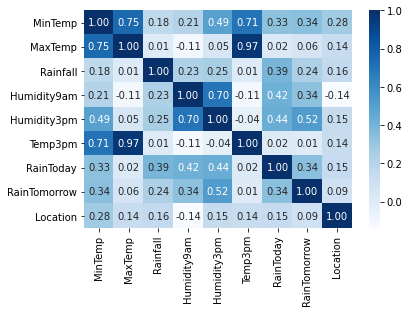

In [27]:
sb.heatmap(dfNaive.corr(), annot=True, fmt=".2f", cmap='Blues')

#### SVM


In [28]:
from sklearn.model_selection import train_test_split

dfSvm = dfStandard.copy()

X_train, X_test, y_train, y_test = train_test_split(dfSvm.drop(columns=['Location']), dfSvm['Location'],test_size=0.33, stratify=dfSvm['Location'])

In [29]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'], 
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
} 

In [30]:
from sklearn.svm import SVC

grid = GridSearchCV(SVC(),param_grid, verbose = 1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [31]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [32]:
pred = grid.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       309
           1       0.54      0.61      0.57       309
           2       0.65      0.67      0.66       309
           3       0.67      0.63      0.65       309

    accuracy                           0.62      1236
   macro avg       0.62      0.62      0.62      1236
weighted avg       0.62      0.62      0.62      1236



In [33]:
treinoSvm = runmodel(dfSvm.drop('Location', axis = 1), dfSvm['Location'], grid.best_estimator_, 10, 1)
treinoSvm.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.62(0.04) 	 0.55(0.05) 	 0.58(0.04) 	 93.6(0.49)

1 		 0.52(0.03) 	 0.58(0.05) 	 0.55(0.03) 	 93.6(0.49)

2 		 0.64(0.02) 	 0.65(0.04) 	 0.64(0.03) 	 93.6(0.49)

3 		 0.68(0.04) 	 0.66(0.05) 	 0.67(0.04) 	 93.6(0.49)

accuracy 		  		  	 0.61(0.02) 		 

weighted avg 	 0.61(0.02) 	 0.61(0.02) 	 0.61(0.02) 	 374.4(0.49)



In [34]:
# dfGridSearch = pd.DataFrame(grid.cv_results_)

In [35]:
# dfGridSearch.loc[dfGridSearch['rank_test_score'] == 1, :]

### MLP

In [36]:
from sklearn.neural_network import MLPClassifier

dfMlp = dfStandard.copy()

#Dividindo a base para um teste simples
X_train, X_test, y_train, y_test = train_test_split(dfMlp.drop(columns=['Location']), dfMlp['Location'],test_size=0.33, stratify=dfMlp['Location'])

mlp = MLPClassifier() #configuração default
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [37]:
pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       309
           1       0.59      0.56      0.58       309
           2       0.66      0.68      0.67       309
           3       0.67      0.72      0.70       309

    accuracy                           0.63      1236
   macro avg       0.63      0.63      0.63      1236
weighted avg       0.63      0.63      0.63      1236



### Escolhendo os melhores parâmetros usando o GridSearch

In [38]:
param_grid = {
    'hidden_layer_sizes': [(100, ), (7,), (7, 3)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 1000, 5000, 10000]
}

grid = GridSearchCV(MLPClassifier(),param_grid, verbose = 1)
grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

In [39]:
grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.001,
 'max_iter': 10000}

In [40]:
pred = grid.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       309
           1       0.57      0.60      0.58       309
           2       0.65      0.68      0.67       309
           3       0.70      0.70      0.70       309

    accuracy                           0.63      1236
   macro avg       0.63      0.63      0.63      1236
weighted avg       0.63      0.63      0.63      1236



In [41]:
treinoMlp = runmodel(dfMlp.drop('Location', axis = 1), dfMlp['Location'], grid.best_estimator_, 10, 1)
treinoMlp.mostraresultadomedio()

1 validação cruzada com 10 folds
		 precision 	 recall 	 f1-score 	 support

0 		 0.61(0.04) 	 0.55(0.05) 	 0.58(0.04) 	 93.6(0.49)

1 		 0.53(0.04) 	 0.57(0.03) 	 0.55(0.03) 	 93.6(0.49)

2 		 0.64(0.04) 	 0.65(0.03) 	 0.64(0.02) 	 93.6(0.49)

3 		 0.68(0.04) 	 0.68(0.07) 	 0.68(0.04) 	 93.6(0.49)

accuracy 		  		  	 0.61(0.03) 		 

weighted avg 	 0.61(0.03) 	 0.61(0.03) 	 0.61(0.03) 	 374.4(0.49)



In [42]:
# grid.best_params_

In [43]:
# grid.best_score_

In [44]:
# pred = grid.predict(X_test)
# print(metrics.classification_report(y_test, pred))

In [45]:
# dfGridSearch = pd.DataFrame(grid.cv_results_)

In [46]:
# dfGridSearch.loc[dfGridSearch['rank_test_score'] == 1, :]